# <u><center>**Crime Data Part 1**</u>
* Authored By: Eric N Valdez
* Date: 02/11/2024

## <u>Chicago Crime Data</u>
* **We have prepared a zip file with the Chicago crime data** which you can download [here](https://drive.google.com/file/d/1avxUlCAros-R9GF6SKXqM_GopzO7VwA5/view).
* `Original Source:` Chicago Data Portal: Crimes 2001 to Present
    * Data Description:
        * All Crimes were reported in the city of Chicago and their details [View Preview](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data)
    * Includes:
        * type of crime, exact date /time, lat/long, District 
    * `Note:` 
    * We have provided a .zipfile (linked above with the data in a repo-friendly format. For those who are curious the code for converting the downloaded file to the .zip file of individual years, please see [this helper notebook.](https://github.com/coding-dojo-data-science/preparing-chicago-crime-data/blob/admin/Workflow%20-%20Prep%20Chicago%20Crime%20Data.ipynb)

* **Supplemental Data: Holiday Data**
    * Check the lesson on "Feature Engineering: Holidays" to see how to use they Python 'holidays' package to add holidays to your dataset.
* **Notes/Considerations:**
    * You may need to keep 2 forms of the data:
        * The `original` individual crime data wotj a datetime index. `(Each row is 1 crime)`
        * A resampled / converted crime counts version `(Each row is 1 day)`  

# <u>Task</u>
Your task is to answer a series of questions about trends in crimes in Chicago for a reporter for the local newspaper.

**Stakeholder Questions to Answer (Pick at least 3 tipics)**:

<u>Select 3 or more of the following topics to analyze:

## <u>Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import calendar

# imports for supplemental Data
import holidays
import datetime as dt
from holidays import country_holidays

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)

# set random seed
SEED = 321
np.random.seed(SEED)

#display more columns
pd.set_option('display.max_columns',50)

## <u>Load Data

In [2]:
data = 'Data/Chicago-Crime_2001.csv'
df_2001 = pd.read_csv(data)
df_2001.head()

ID                    Date     Primary Type          Description  \
0  1326041  01/01/2001 01:00:00 AM          BATTERY               SIMPLE   
1  1319931  01/01/2001 01:00:00 PM          BATTERY               SIMPLE   
2  1324743  01/01/2001 01:00:00 PM         GAMBLING  ILLEGAL ILL LOTTERY   
3  1310717  01/01/2001 01:00:00 AM  CRIMINAL DAMAGE           TO VEHICLE   
4  1318099  01/01/2001 01:00:00 AM          BATTERY               SIMPLE   

      Location Description  Arrest  Domestic  Beat  District  Ward   Latitude  \
0                RESIDENCE   False     False  1624      16.0   NaN  41.957850   
1                RESIDENCE   False      True   825       8.0   NaN  41.783892   
2                   STREET    True     False   313       3.0   NaN  41.780412   
3                   STREET   False     False  2424      24.0   NaN  42.012391   
4  RESIDENCE PORCH/HALLWAY   False      True   214       2.0   NaN  41.819538   

   Longitude  
0 -87.749185  
1 -87.684841  
2 -87.611970  
3 -87.678032  
4 -87.620020

In [3]:
data = 'Data/Chicago-Crime_2002.csv'
df_2002 = pd.read_csv(data)
df_2002.head()

ID                    Date     Primary Type     Description  \
0  1919929  01/01/2002 01:00:00 AM  CRIMINAL DAMAGE      TO VEHICLE   
1  2054511  01/01/2002 01:00:00 PM  CRIMINAL DAMAGE     TO PROPERTY   
2  1922597  01/01/2002 01:00:00 AM          BATTERY          SIMPLE   
3  1980460  01/01/2002 01:00:00 AM          ROBBERY  ARMED: HANDGUN   
4  1917943  01/01/2002 01:00:00 AM          BATTERY          SIMPLE   

  Location Description  Arrest  Domestic  Beat  District  Ward   Latitude  \
0               STREET   False     False  1811      18.0   NaN  41.924111   
1            RESIDENCE   False     False  2532      25.0   NaN  41.910071   
2            APARTMENT   False      True   332       3.0   NaN  41.773350   
3               STREET   False     False   331       3.0   NaN  41.768970   
4        CHA APARTMENT    True      True  2113       1.0   NaN  41.844113   

   Longitude  
0 -87.665763  
1 -87.763019  
2 -87.584774  
3 -87.575151  
4 -87.628445

In [4]:
data = 'Data/Chicago-Crime_2003.csv'
df_2003 = pd.read_csv(data)
df_2003.head()

ID                    Date       Primary Type  \
0  2523392  01/01/2003 01:00:00 AM    CRIMINAL DAMAGE   
1  2530494  01/01/2003 01:00:00 AM              THEFT   
2  3116714  01/01/2003 01:00:00 PM      OTHER OFFENSE   
3  2526097  01/01/2003 01:00:00 AM  WEAPONS VIOLATION   
4  2582131  01/01/2003 01:00:00 PM      OTHER OFFENSE   

                Description Location Description  Arrest  Domestic  Beat  \
0                TO VEHICLE               STREET   False     False  1732   
1             FROM BUILDING        BAR OR TAVERN   False     False  1933   
2           ANIMAL FIGHTING               STREET   False     False   915   
3  UNLAWFUL POSS OF HANDGUN            RESIDENCE    True     False   912   
4   HARASSMENT BY TELEPHONE            RESIDENCE   False     False  1522   

   District  Ward   Latitude  Longitude  
0      17.0  30.0  41.941927 -87.719929  
1      19.0  32.0  41.929290 -87.654144  
2       9.0  16.0  41.795304 -87.674341  
3       9.0  12.0  41.813264 -87.690686  
4      15.0  29.0  41.878367 -87.763074

In [5]:
data = 'Data/Chicago-Crime_2004.csv'
df_2004 = pd.read_csv(data)
df_2004.head()

ID                    Date         Primary Type  \
0  3116095  01/01/2004 01:00:00 AM      CRIMINAL DAMAGE   
1  3114218  01/01/2004 01:00:00 AM      CRIMINAL DAMAGE   
2  3114283  01/01/2004 01:00:00 AM        OTHER OFFENSE   
3  3167308  01/01/2004 01:00:00 AM        OTHER OFFENSE   
4  3114077  01/01/2004 01:00:00 AM  MOTOR VEHICLE THEFT   

               Description Location Description  Arrest  Domestic  Beat  \
0              TO PROPERTY           DRUG STORE    True     False   122   
1              TO PROPERTY     RESIDENCE-GARAGE   False     False  1223   
2  HARASSMENT BY TELEPHONE            RESIDENCE   False     False  1732   
3         TELEPHONE THREAT            RESIDENCE   False     False   533   
4               AUTOMOBILE               STREET   False     False   413   

   District  Ward   Latitude  Longitude  
0       1.0  42.0  41.887154 -87.624546  
1      12.0  25.0  41.853000 -87.681629  
2      17.0  30.0  41.944581 -87.725248  
3       5.0   9.0  41.658266 -87.615139  
4       4.0   8.0  41.728604 -87.594936

In [6]:
data = 'Data/Chicago-Crime_2005.csv'
df_2005 = pd.read_csv(data)
df_2005.head()

ID                    Date         Primary Type  \
0  3733149  01/01/2005 01:00:00 AM              BATTERY   
1  3744986  01/01/2005 01:00:00 AM      CRIMINAL DAMAGE   
2  3735752  01/01/2005 01:00:00 PM  MOTOR VEHICLE THEFT   
3  3733134  01/01/2005 01:00:00 AM              BATTERY   
4  3731704  01/01/2005 01:00:00 AM                THEFT   

                  Description Location Description  Arrest  Domestic  Beat  \
0                      SIMPLE                OTHER   False     False  1732   
1                  TO VEHICLE               STREET   False     False   524   
2  THEFT/RECOVERY: AUTOMOBILE            RESIDENCE    True     False  2232   
3                      SIMPLE          HOTEL/MOTEL   False     False   132   
4               FROM BUILDING            RESIDENCE   False     False   512   

   District  Ward   Latitude  Longitude  
0      17.0  35.0  41.939270 -87.712795  
1       5.0  34.0  41.672933 -87.658804  
2      22.0   9.0  41.711512 -87.639312  
3       1.0   2.0  41.872709 -87.624188  
4       5.0   9.0  41.702620 -87.622204

In [7]:
data = 'Data/Chicago-Crime_2006.csv'
df_2006 = pd.read_csv(data)
df_2006.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448179 entries, 0 to 448178
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    448179 non-null  int64  
 1   Date                  448179 non-null  object 
 2   Primary Type          448179 non-null  object 
 3   Description           448179 non-null  object 
 4   Location Description  448161 non-null  object 
 5   Arrest                448179 non-null  bool   
 6   Domestic              448179 non-null  bool   
 7   Beat                  448179 non-null  int64  
 8   District              448178 non-null  float64
 9   Ward                  448176 non-null  float64
 10  Latitude              445564 non-null  float64
 11  Longitude             445564 non-null  float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 35.0+ MB


In [8]:
data = 'Data/Chicago-Crime_2007.csv'
df_2007 = pd.read_csv(data)
df_2007.head()

ID                    Date                Primary Type  \
0  7358749  01/01/2007 01:00:00 AM                 SEX OFFENSE   
1  8056573  01/01/2007 01:00:00 AM  OFFENSE INVOLVING CHILDREN   
2  5219281  01/01/2007 01:00:00 AM                       THEFT   
3  5216050  01/01/2007 01:00:00 PM                       THEFT   
4  6567568  01/01/2007 01:00:00 PM          DECEPTIVE PRACTICE   

                    Description Location Description  Arrest  Domestic  Beat  \
0     AGG CRIMINAL SEXUAL ABUSE            RESIDENCE   False      True   712   
1  CRIM SEX ABUSE BY FAM MEMBER            RESIDENCE   False      True  1012   
2                 FROM BUILDING            RESIDENCE   False      True   833   
3                $500 AND UNDER               STREET   False     False  1612   
4             CREDIT CARD FRAUD            APARTMENT   False     False  1412   

   District  Ward   Latitude  Longitude  
0       7.0  16.0        NaN        NaN  
1      10.0  24.0        NaN        NaN  
2       8.0  13.0  41.771474 -87.716137  
3      16.0  41.0  41.987439 -87.816819  
4      14.0  35.0  41.936377 -87.717310

In [9]:
data = 'Data/Chicago-Crime_2008.csv'
df_2008 = pd.read_csv(data)
df_2008.head

<bound method NDFrame.head of              ID                    Date        Primary Type  \
0       6656695  01/01/2008 01:00:00 PM               THEFT   
1       6011954  01/01/2008 01:00:00 PM     CRIMINAL DAMAGE   
2       6001107  01/01/2008 01:00:00 AM  DECEPTIVE PRACTICE   
3       6001235  01/01/2008 01:00:00 AM             BATTERY   
4       6022810  01/01/2008 01:00:00 AM   CRIMINAL TRESPASS   
...         ...                     ...                 ...   
427178  6683933  12/31/2008 12:55:00 AM             BATTERY   
427179  6689849  12/31/2008 12:55:00 PM            BURGLARY   
427180  6685843  12/31/2008 12:57:00 PM             BATTERY   
427181  6684556  12/31/2008 12:58:22 AM             BATTERY   
427182  6685845  12/31/2008 12:59:16 AM            BURGLARY   

                           Description            Location Description  \
0        FINANCIAL ID THEFT: OVER $300                       RESIDENCE   
1                           TO VEHICLE          VEHICLE NON-COMME

In [10]:
data = 'Data/Chicago-Crime_2009.csv'
df_2009 = pd.read_csv(data)
df_2009.info

<bound method DataFrame.info of              ID                    Date         Primary Type  \
0       6686041  01/01/2009 01:00:00 AM  MOTOR VEHICLE THEFT   
1       6687183  01/01/2009 01:00:00 AM      CRIMINAL DAMAGE   
2       9729347  01/01/2009 01:00:00 PM   DECEPTIVE PRACTICE   
3       6686464  01/01/2009 01:00:00 AM                THEFT   
4       6685944  01/01/2009 01:00:00 AM                THEFT   
...         ...                     ...                  ...   
392822  7296394  12/31/2009 12:50:00 PM              ROBBERY   
392823  7296402  12/31/2009 12:50:00 PM              BATTERY   
392824  7296449  12/31/2009 12:50:00 PM              BATTERY   
392825  7299033  12/31/2009 12:53:00 AM             BURGLARY   
392826  7295358  12/31/2009 12:54:00 AM            NARCOTICS   

                                Description          Location Description  \
0                                AUTOMOBILE                        STREET   
1                               TO PROPERTY  

In [11]:
data = 'Data/Chicago-Crime_2010.csv'
df_2010 = pd.read_csv(data)
df_2010.describe

<bound method NDFrame.describe of              ID                    Date       Primary Type  \
0       7330325  01/01/2010 01:00:00 AM              THEFT   
1       7298225  01/01/2010 01:00:00 AM              THEFT   
2       7297561  01/01/2010 01:00:00 PM    CRIMINAL DAMAGE   
3       7439933  01/01/2010 01:00:00 PM              THEFT   
4       7297731  01/01/2010 01:00:00 AM            ASSAULT   
...         ...                     ...                ...   
370508  7868504  12/31/2010 12:45:00 AM    CRIMINAL DAMAGE   
370509  7869132  12/31/2010 12:50:00 PM            BATTERY   
370510  7868511  12/31/2010 12:53:00 AM          NARCOTICS   
370511  7868549  12/31/2010 12:55:00 AM    CRIMINAL DAMAGE   
370512  7868529  12/31/2010 12:58:00 AM  CRIMINAL TRESPASS   

                           Description      Location Description  Arrest  \
0                       $500 AND UNDER        SMALL RETAIL STORE   False   
1                        FROM BUILDING                 RESIDENCE   Fa

In [12]:
data = 'Data/Chicago-Crime_2011.csv'
df_2011 = pd.read_csv(data)
df_2011.head()

ID                    Date     Primary Type  \
0  8354978  01/01/2011 01:00:00 AM            THEFT   
1  7869581  01/01/2011 01:00:00 AM          ROBBERY   
2  8572704  01/01/2011 01:00:00 PM            THEFT   
3  7875948  01/01/2011 01:00:00 AM            THEFT   
4  7870048  01/01/2011 01:00:00 AM  CRIMINAL DAMAGE   

                      Description           Location Description  Arrest  \
0   FINANCIAL ID THEFT: OVER $300                      RESIDENCE   False   
1                  ARMED: HANDGUN                    GAS STATION   False   
2  FINANCIAL ID THEFT:$300 &UNDER                      RESIDENCE   False   
3                   FROM BUILDING                      APARTMENT   False   
4                     TO PROPERTY  RESIDENTIAL YARD (FRONT/BACK)   False   

   Domestic  Beat  District  Ward   Latitude  Longitude  
0     False  2522      25.0  30.0  41.917978 -87.735149  
1     False   733       7.0  17.0  41.762929 -87.644355  
2     False   714       7.0  15.0  41.782875 -87.676675  
3     False  1811      18.0  32.0  41.922466 -87.657152  
4     False  1722      17.0  38.0  41.959862 -87.732662

In [13]:
data = 'Data/Chicago-Crime_2012.csv'
df_2012 = pd.read_csv(data)
df_2012.head(-1)

ID                    Date                Primary Type  \
0       8425562  01/01/2012 01:00:00 AM                       THEFT   
1       9049473  01/01/2012 01:00:00 AM  OFFENSE INVOLVING CHILDREN   
2       8426330  01/01/2012 01:00:00 PM               OTHER OFFENSE   
3       8428545  01/01/2012 01:00:00 AM                       THEFT   
4       8421811  01/01/2012 01:00:00 AM         CRIM SEXUAL ASSAULT   
...         ...                     ...                         ...   
336313  8950429  12/31/2012 12:45:00 PM                       THEFT   
336314  8949990  12/31/2012 12:50:00 AM                     BATTERY   
336315  8949987  12/31/2012 12:50:00 AM                       THEFT   
336316  8950354  12/31/2012 12:50:00 PM             CRIMINAL DAMAGE   
336317  8949977  12/31/2012 12:55:00 AM                     BATTERY   

                          Description Location Description  Arrest  Domestic  \
0                      $500 AND UNDER          HOTEL/MOTEL   False     False   
1       SEX ASSLT OF CHILD BY FAM MBR            RESIDENCE   False     False   
2                    TELEPHONE THREAT            RESIDENCE   False      True   
3                       FROM BUILDING            APARTMENT   False     False   
4                      NON-AGGRAVATED               STREET   False     False   
...                               ...                  ...     ...       ...   
336313                   RETAIL THEFT     DEPARTMENT STORE    True     False   
336314        DOMESTIC BATTERY SIMPLE            APARTMENT    True      True   
336315                 $500 AND UNDER             SIDEWALK   False     False   
336316                    TO PROPERTY           BARBERSHOP   False     False   
336317        DOMESTIC BATTERY SIMPLE            APARTMENT   False      True   

        Beat  District  Ward   Latitude  Longitude  
0        124       1.0  42.0  41.888165 -87.622937  
1        332       3.0   5.0  41.772569 -87.585058  
2       2123       2.0   4.0  41.812560 -87.604434  
3       1833      18.0  42.0  41.898333 -87.627464  
4        123       1.0   2.0  41.872709 -87.624188  
...      ...       ...   ...        ...        ...  
336313   833       8.0  13.0  41.754593 -87.741529  
336314  1011      10.0  24.0  41.865526 -87.723931  
336315  1724      17.0  33.0  41.953907 -87.709583  
336316   424       4.0  10.0  41.735565 -87.550857  
336317   312       3.0  20.0  41.779466 -87.609561  

[336318 rows x 12 columns]

In [14]:
data = 'Data/Chicago-Crime_2013.csv'
df_2013 = pd.read_csv(data)
df_2013.head(2)

ID                    Date         Primary Type        Description  \
0  8951657  01/01/2013 01:00:00 PM  MOTOR VEHICLE THEFT         AUTOMOBILE   
1  9476645  01/01/2013 01:00:00 AM  CRIM SEXUAL ASSAULT  AGGRAVATED: OTHER   

  Location Description  Arrest  Domestic  Beat  District  Ward   Latitude  \
0               STREET   False     False  2513      25.0  36.0  41.911726   
1            RESIDENCE    True      True   831       8.0  18.0  41.762299   

   Longitude  
0  -87.79607  
1  -87.69052

In [15]:
data = 'Data/Chicago-Crime_2014.csv'
df_2014 = pd.read_csv(data)
df_2014.head(2)

ID                    Date Primary Type  \
0  9447133  01/01/2014 01:00:00 AM      BATTERY   
1  9446898  01/01/2014 01:00:00 AM      BATTERY   

                           Description Location Description  Arrest  Domestic  \
0                               SIMPLE            APARTMENT   False     False   
1  AGG: HANDS/FIST/FEET SERIOUS INJURY            RESIDENCE   False     False   

   Beat  District  Ward   Latitude  Longitude  
0  2413      24.0  40.0  41.992640 -87.681115  
1   123       1.0   2.0  41.870725 -87.628597

In [16]:
data = 'Data/Chicago-Crime_2015.csv'
df_2015 = pd.read_csv(data)
df_2015.head(2)

ID                    Date Primary Type     Description  \
0  9911752  01/01/2015 01:00:00 AM        THEFT  $500 AND UNDER   
1  9911420  01/01/2015 01:00:00 AM     BURGLARY  FORCIBLE ENTRY   

  Location Description  Arrest  Domestic  Beat  District  Ward   Latitude  \
0               STREET   False     False   432       4.0  10.0  41.717170   
1     RESIDENCE-GARAGE   False     False  1222      12.0  28.0  41.882807   

   Longitude  
0 -87.534078  
1 -87.705031

In [17]:
data = 'Data/Chicago-Crime_2016.csv'
df_2016 = pd.read_csv(data)
df_2016.head(3)

ID                    Date        Primary Type  \
0  10369020  01/01/2016 01:00:00 AM             BATTERY   
1  10597322  01/01/2016 01:00:00 AM               THEFT   
2  10873153  01/01/2016 01:00:00 PM  DECEPTIVE PRACTICE   

                                      Description Location Description  \
0  AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON            APARTMENT   
1                                   FROM BUILDING            RESIDENCE   
2                                    EMBEZZLEMENT               STREET   

   Arrest  Domestic  Beat  District  Ward   Latitude  Longitude  
0   False      True   734       7.0  17.0  41.764927 -87.662460  
1   False     False  1711      17.0  39.0  41.985557 -87.713835  
2    True     False  1832      18.0  42.0  41.893822 -87.629710

In [18]:
data = 'Data/Chicago-Crime_2017.csv'
df_2017 = pd.read_csv(data)
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269100 entries, 0 to 269099
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    269100 non-null  int64  
 1   Date                  269100 non-null  object 
 2   Primary Type          269100 non-null  object 
 3   Description           269100 non-null  object 
 4   Location Description  267802 non-null  object 
 5   Arrest                269100 non-null  bool   
 6   Domestic              269100 non-null  bool   
 7   Beat                  269100 non-null  int64  
 8   District              269099 non-null  float64
 9   Ward                  269099 non-null  float64
 10  Latitude              264956 non-null  float64
 11  Longitude             264956 non-null  float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 21.0+ MB


In [19]:
data = 'Data/Chicago-Crime_2018.csv'
df_2018 = pd.read_csv(data)
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268899 entries, 0 to 268898
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    268899 non-null  int64  
 1   Date                  268899 non-null  object 
 2   Primary Type          268899 non-null  object 
 3   Description           268899 non-null  object 
 4   Location Description  267816 non-null  object 
 5   Arrest                268899 non-null  bool   
 6   Domestic              268899 non-null  bool   
 7   Beat                  268899 non-null  int64  
 8   District              268899 non-null  float64
 9   Ward                  268895 non-null  float64
 10  Latitude              263541 non-null  float64
 11  Longitude             263541 non-null  float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 21.0+ MB


In [20]:
data = 'Data/Chicago-Crime_2019.csv'
df_2019 = pd.read_csv(data)
df_2019.dtypes

ID                        int64
Date                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Latitude                float64
Longitude               float64
dtype: object

In [21]:
data = 'Data/Chicago-Crime_2020.csv'
df_2020 = pd.read_csv(data)
df_2020.dtypes

ID                        int64
Date                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Latitude                float64
Longitude               float64
dtype: object

In [22]:
data = 'Data/Chicago-Crime_2021.csv'
df_2021 = pd.read_csv(data)
df_2021.columns

Index(['ID', 'Date', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Latitude',
       'Longitude'],
      dtype='object')

In [23]:
data = 'Data/Chicago-Crime_2022.csv'
df_2022 = pd.read_csv(data)
df_2022.columns

Index(['ID', 'Date', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Latitude',
       'Longitude'],
      dtype='object')

## <u>Topic 1) Comparing Police Districts</u>
* Which district had the most crimes in 2022?
* Which had the least?

## <u>Topic 2) Crimes Across the Years:</u>
* Is the total number of crimes increasing or decreasing across the years?
* Are there any individual crimes that are doing the opposite ***(e.g., decreasing when overall crime is increasing or vice-versa)***?

`It has decreased over ther years, not really they are all slowly decreasing with time some fluctuate but not by much.`

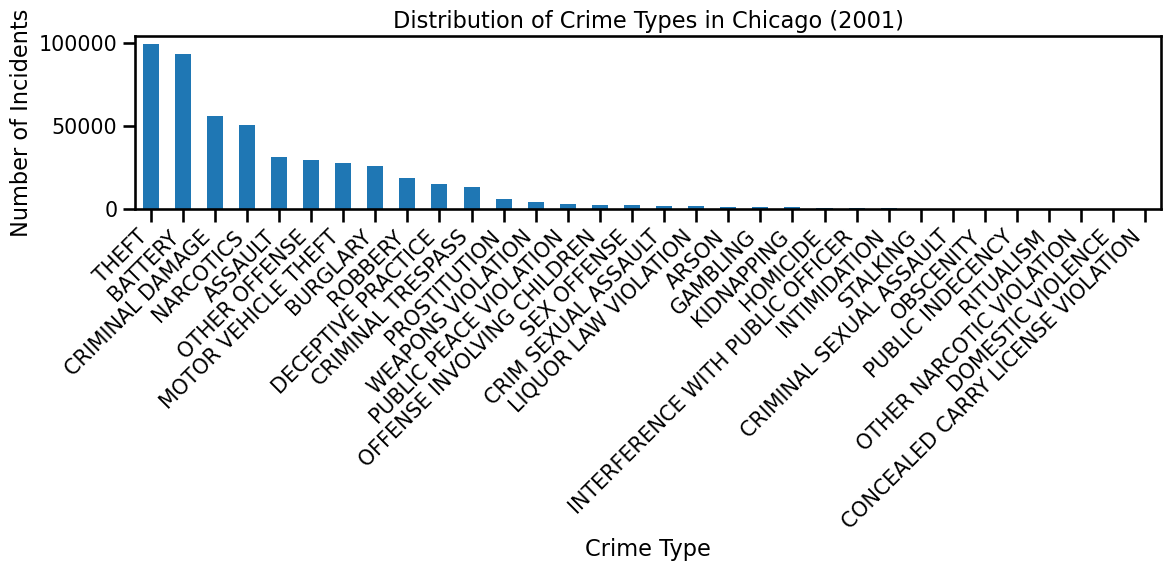

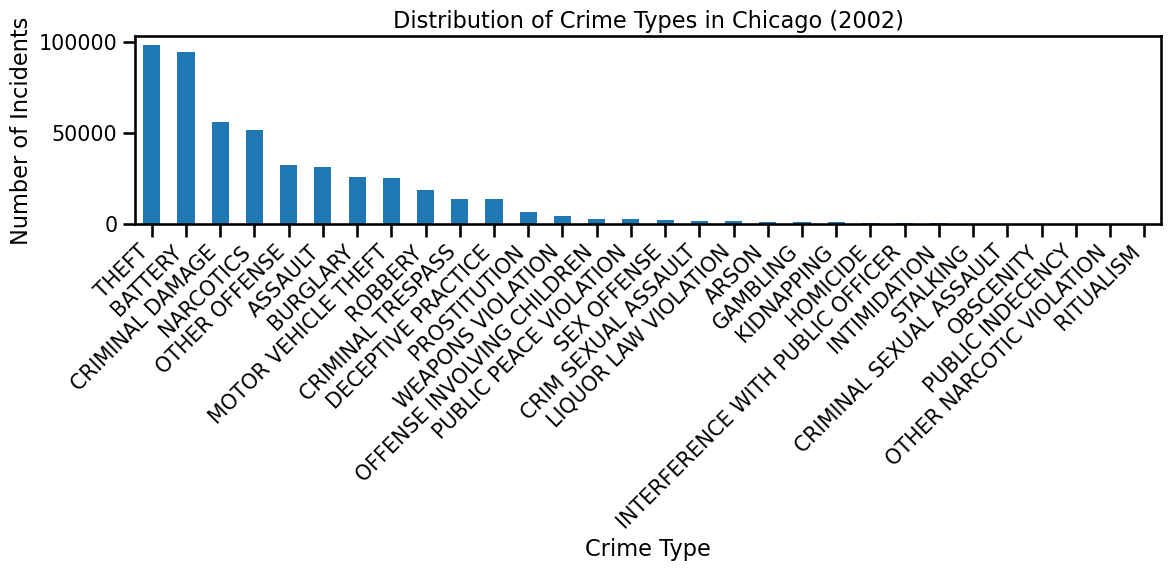

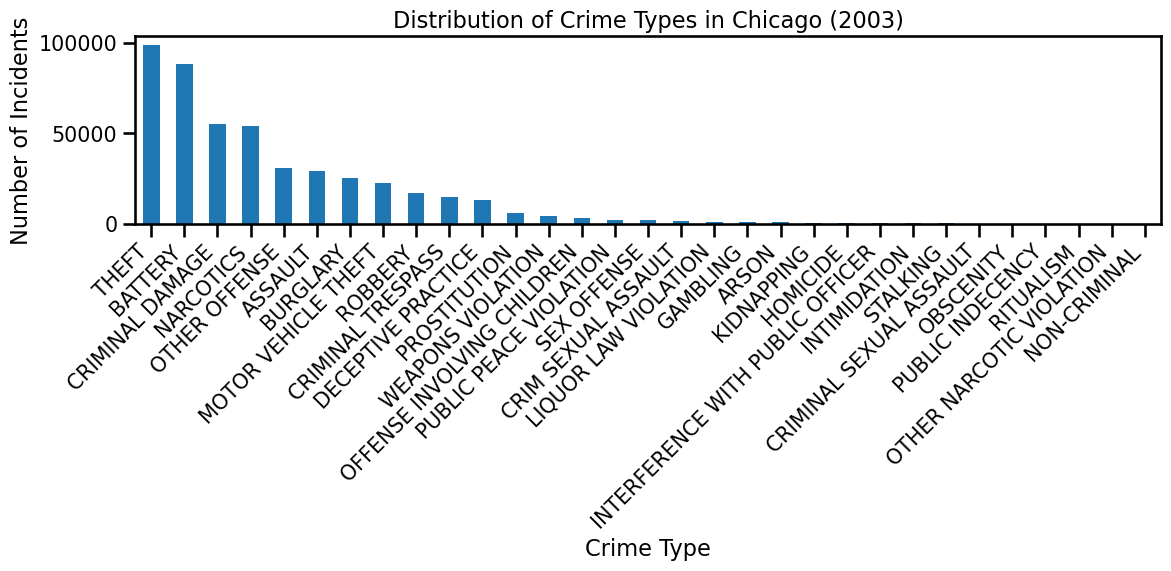

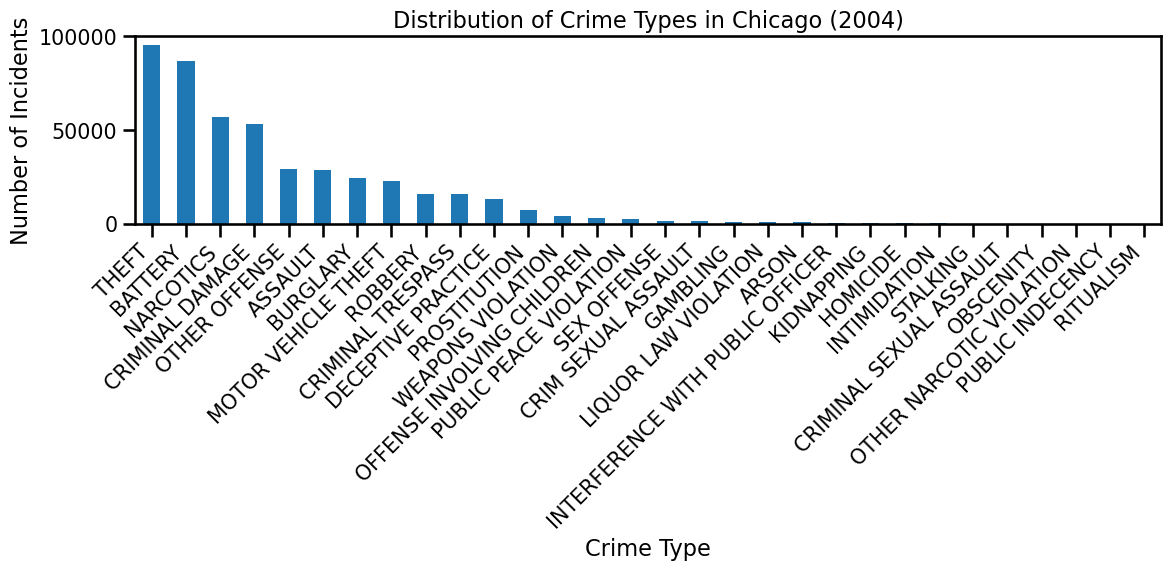

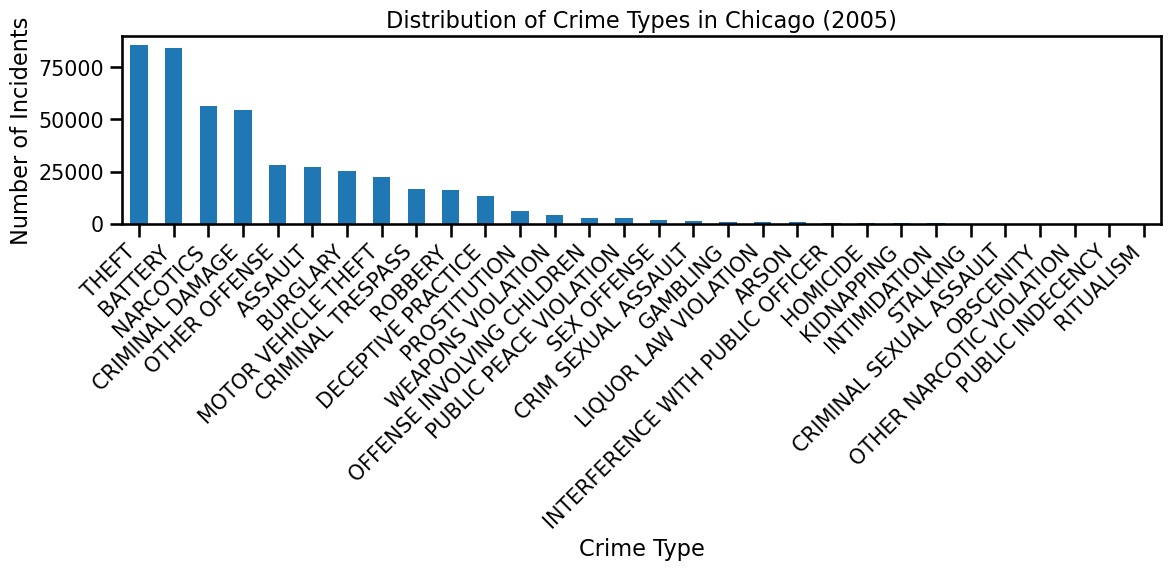

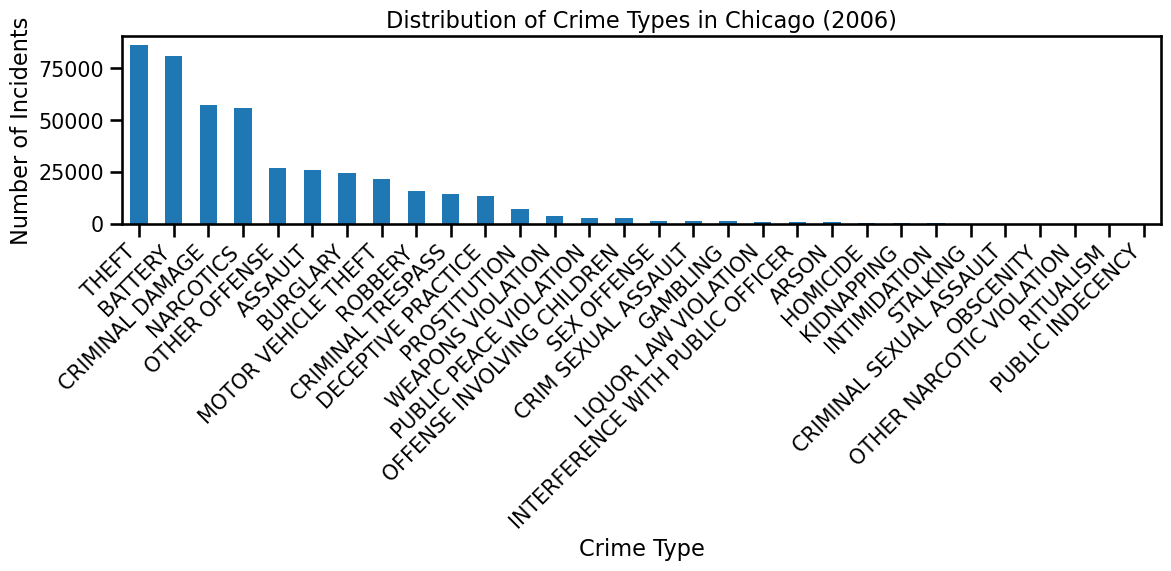

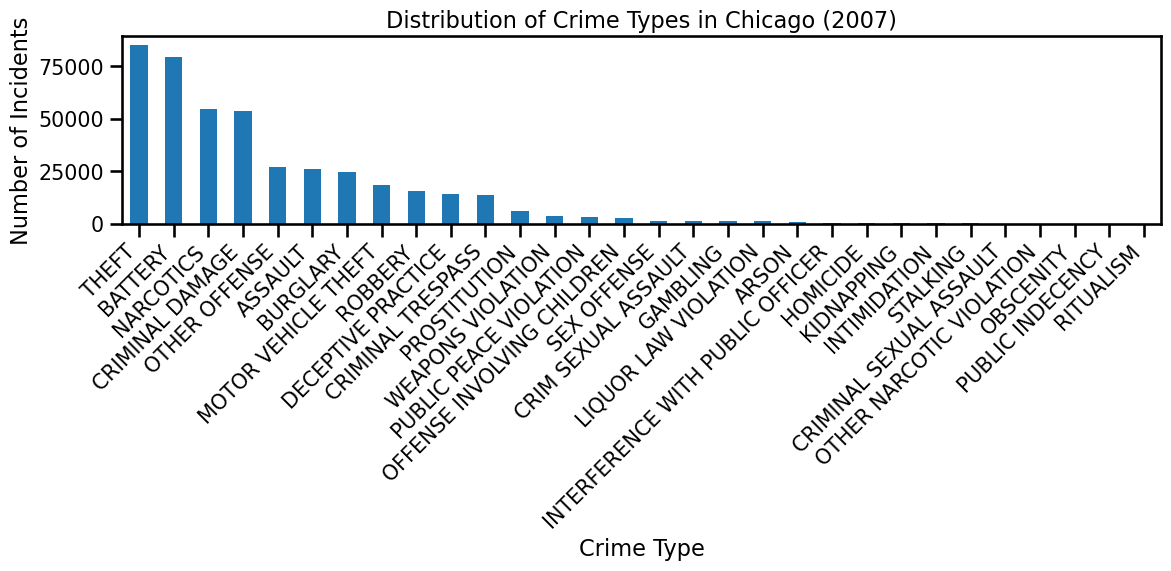

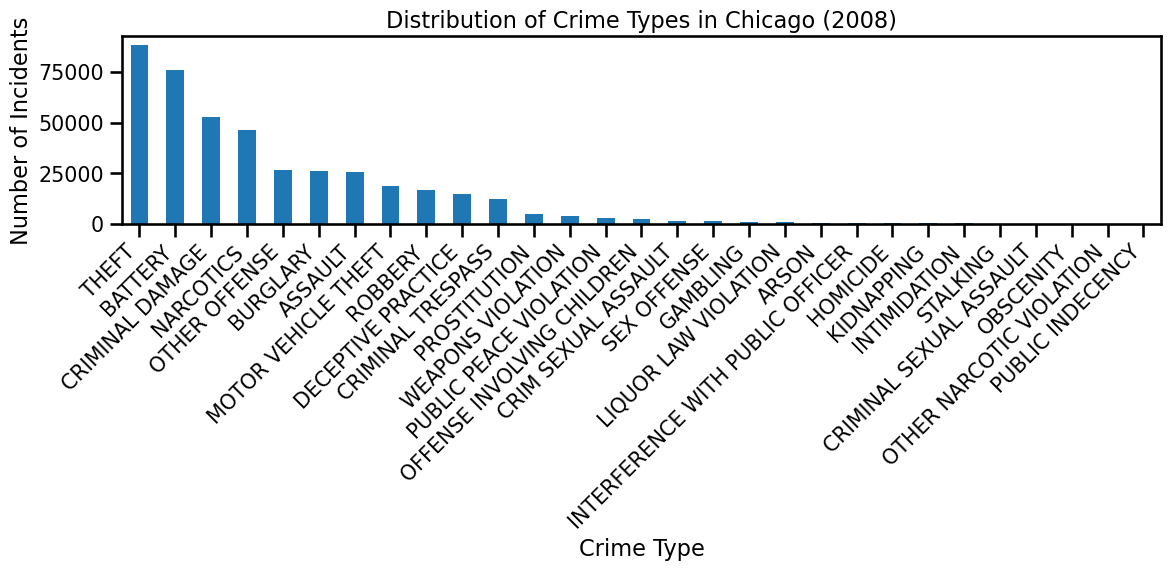

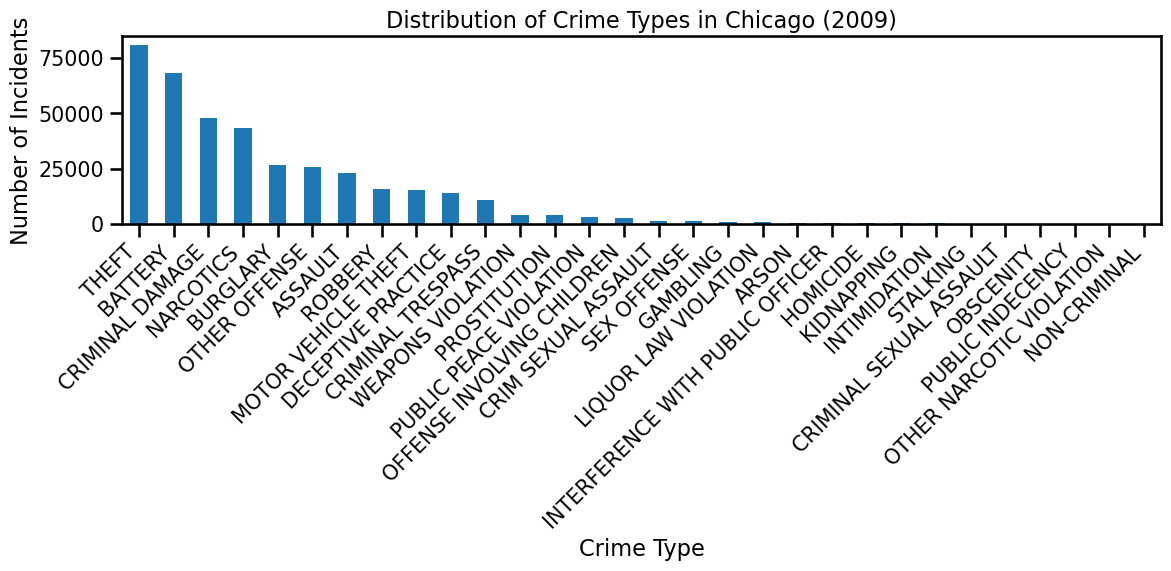

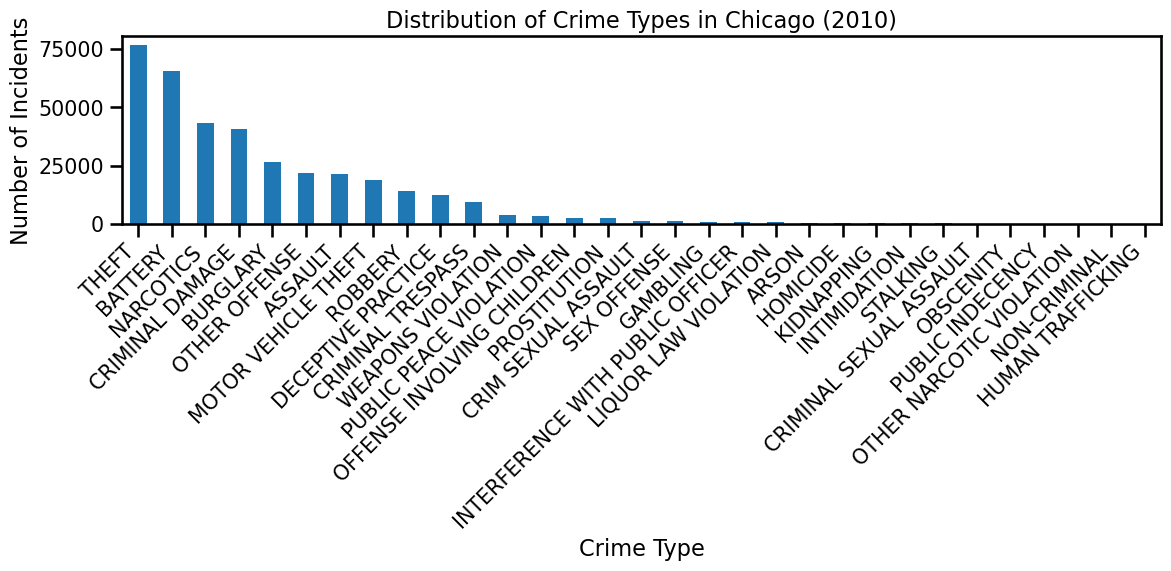

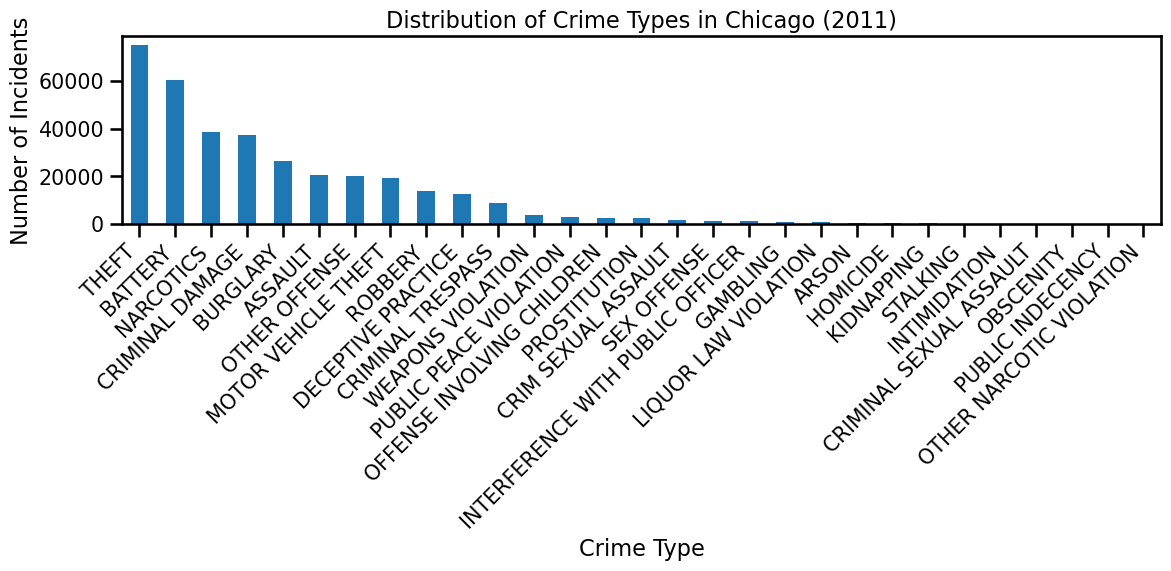

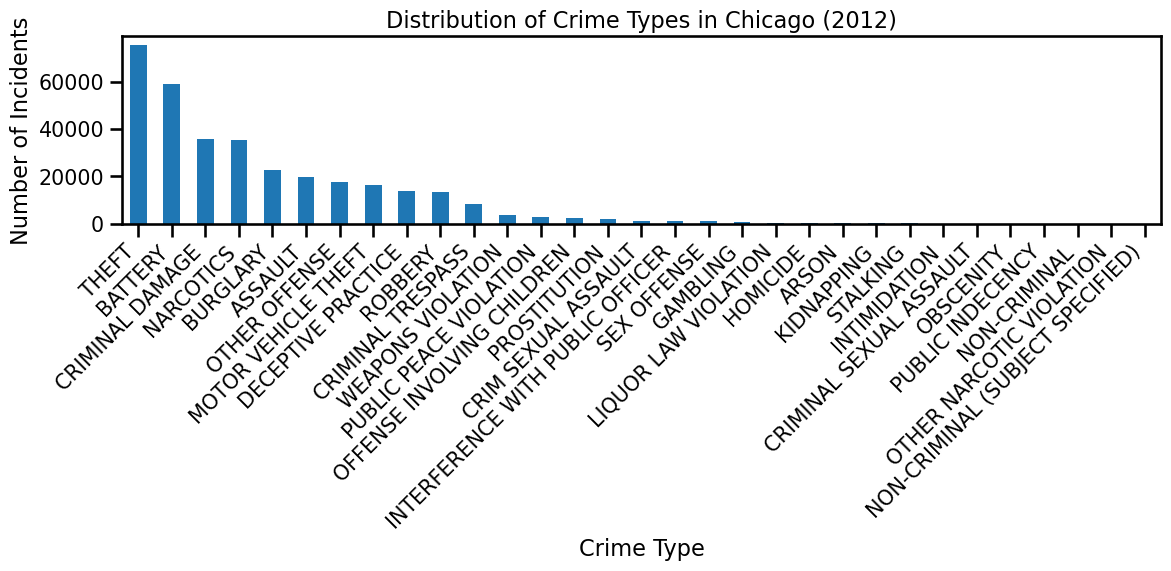

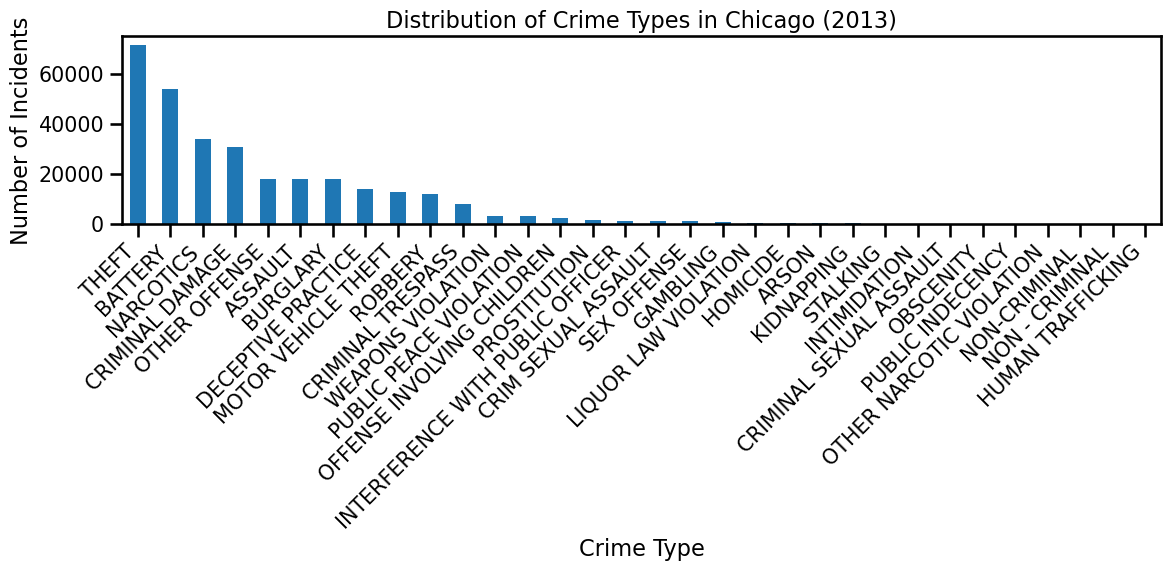

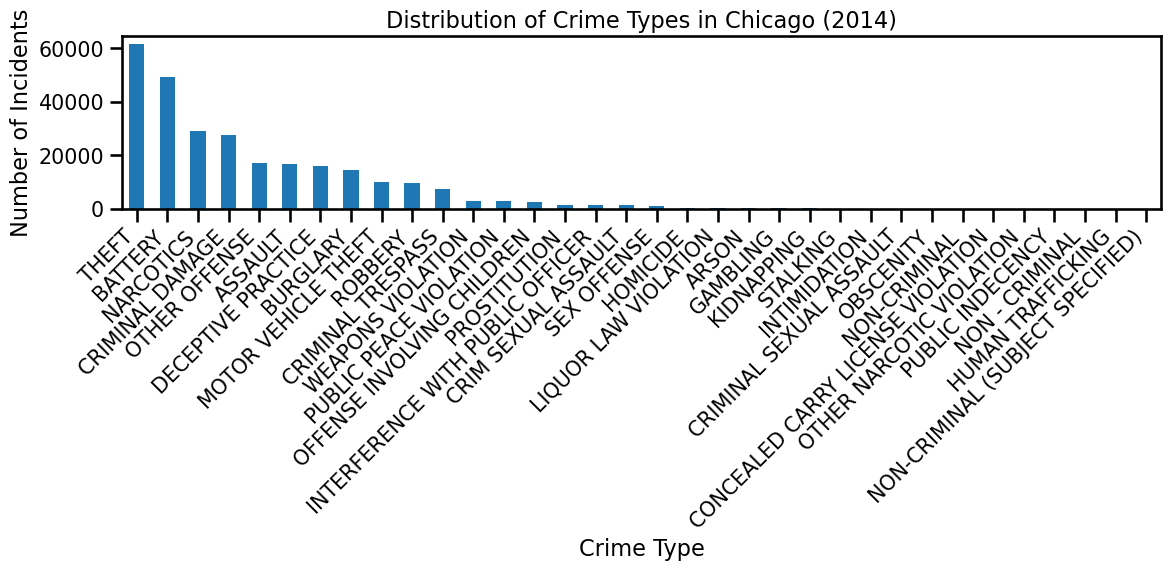

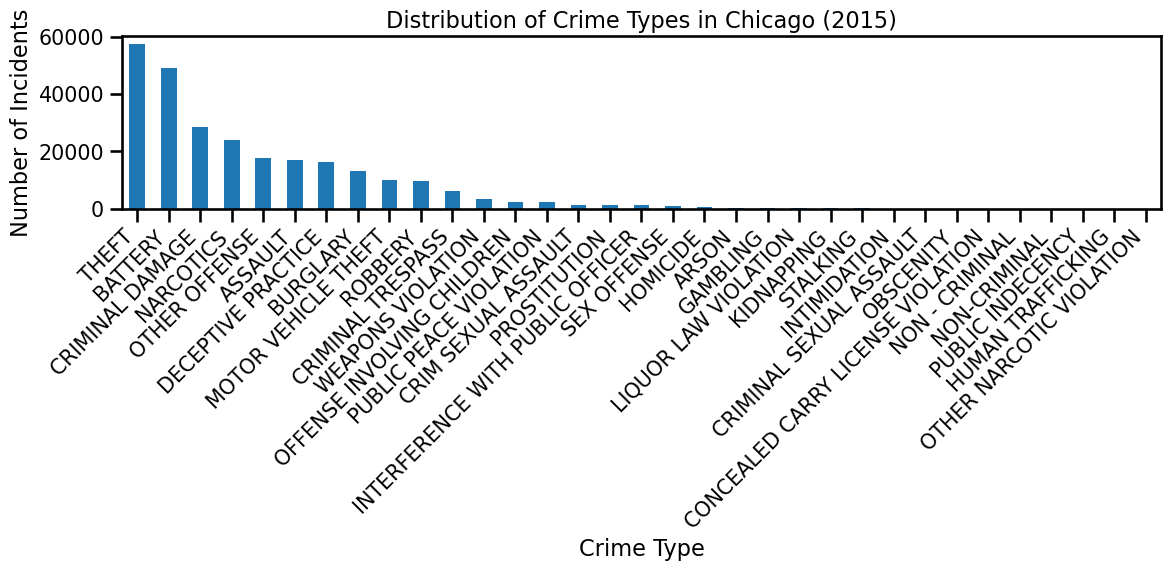

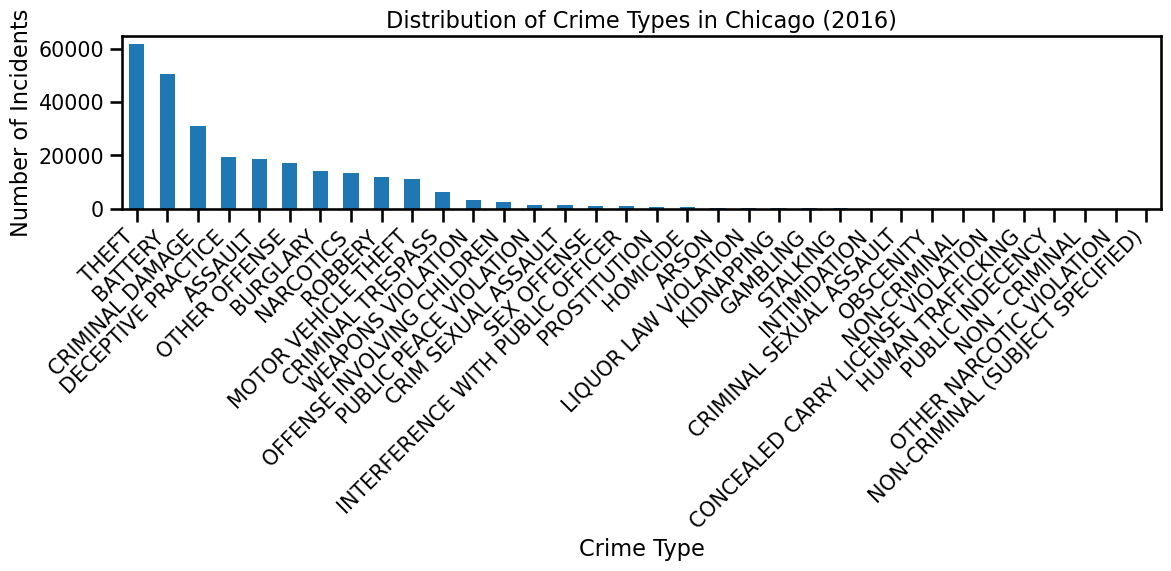

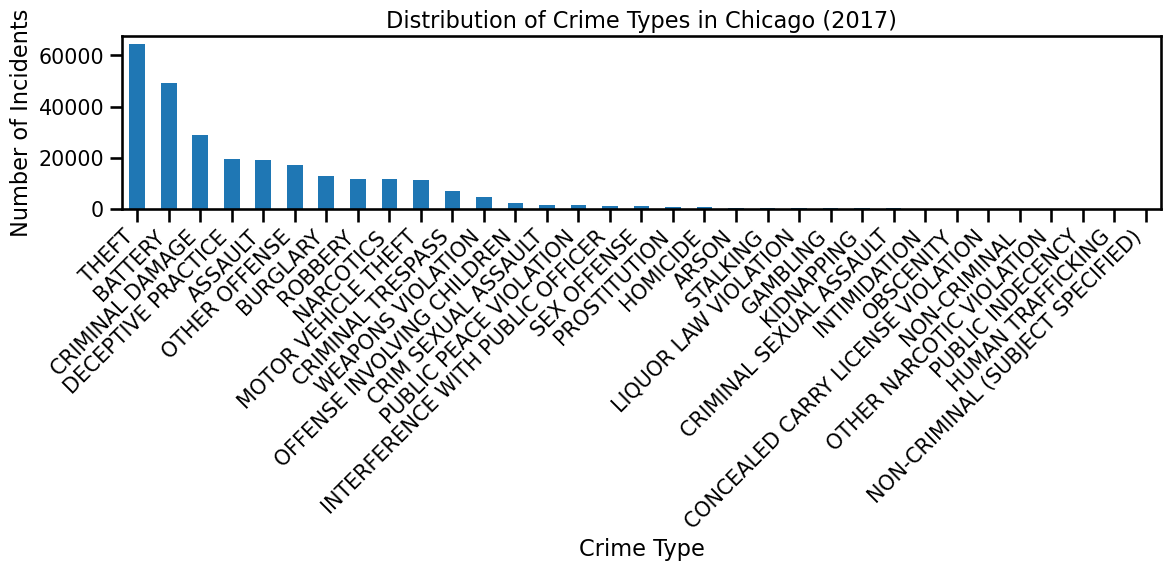

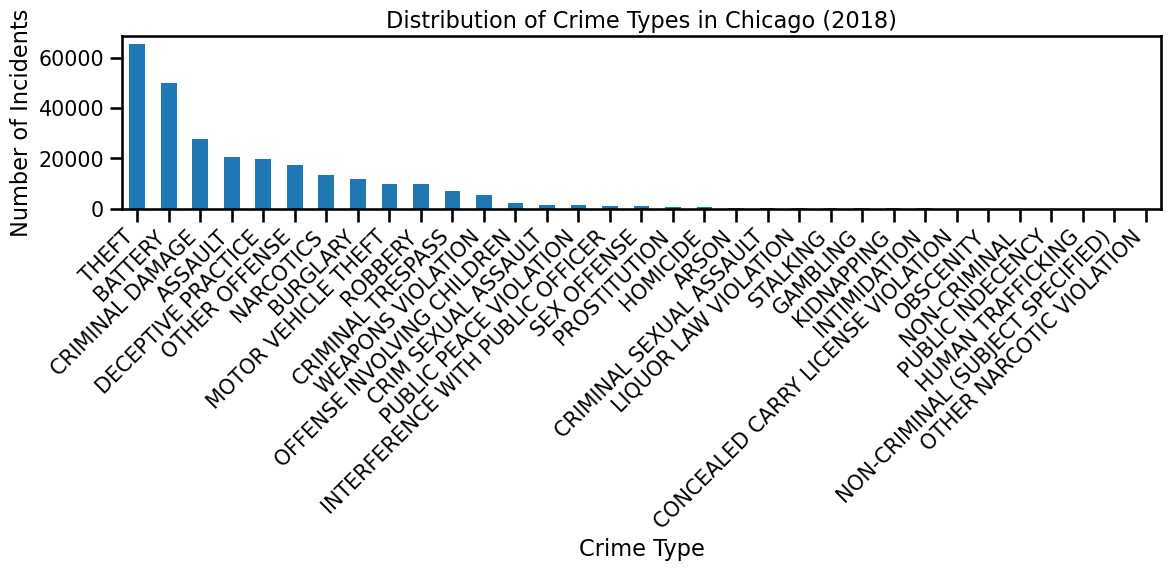

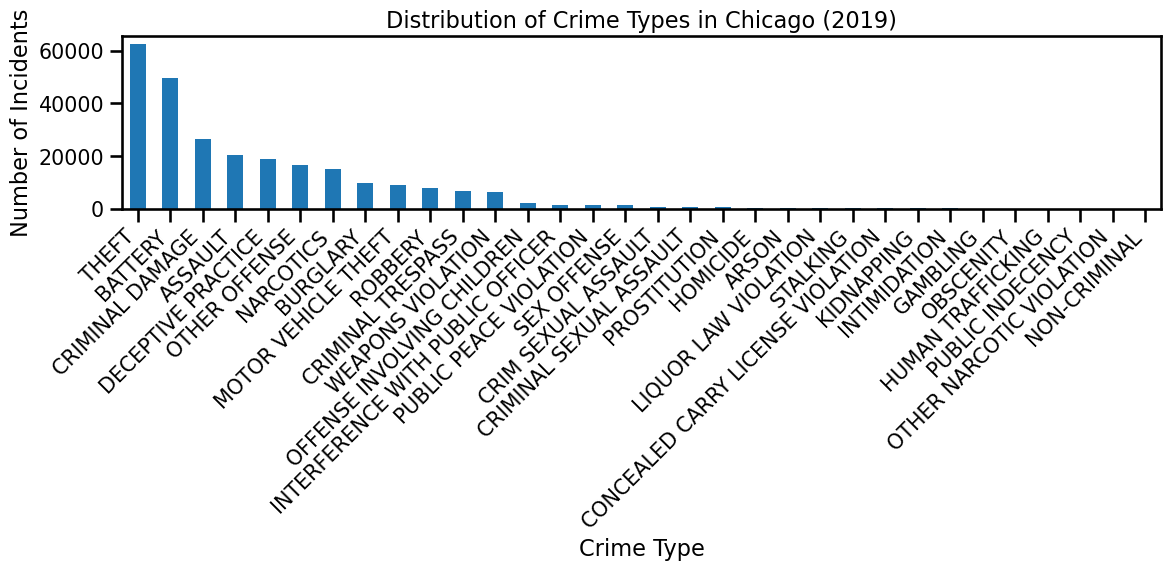

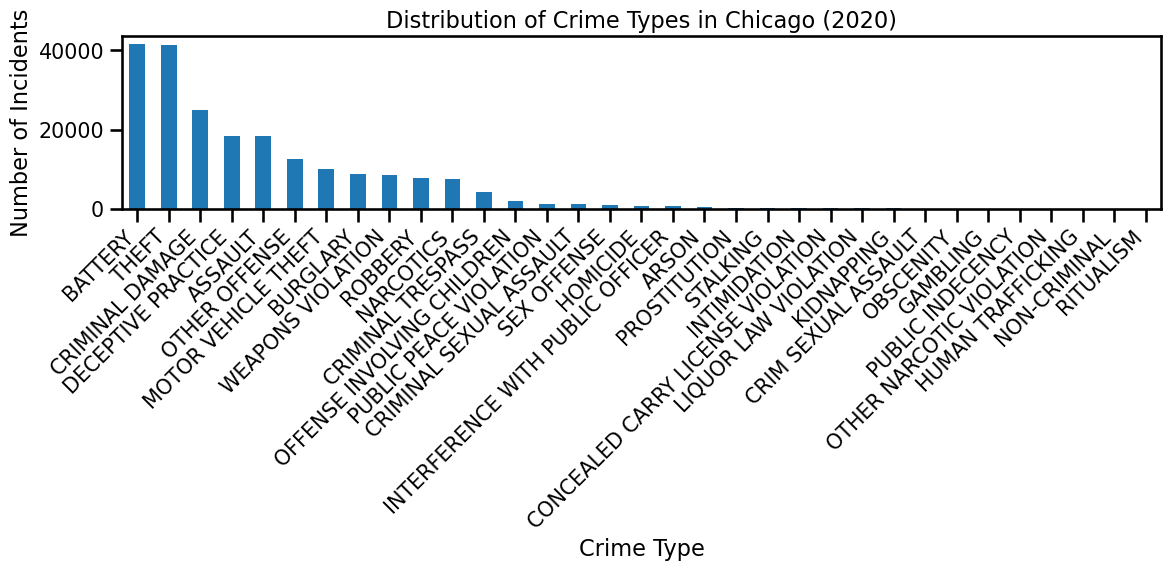

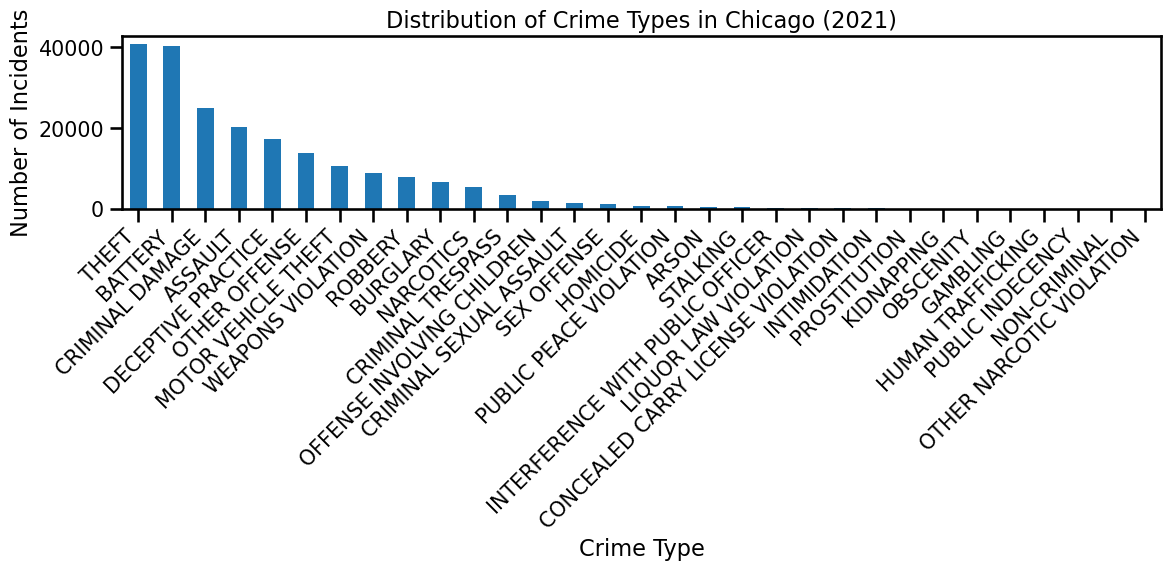

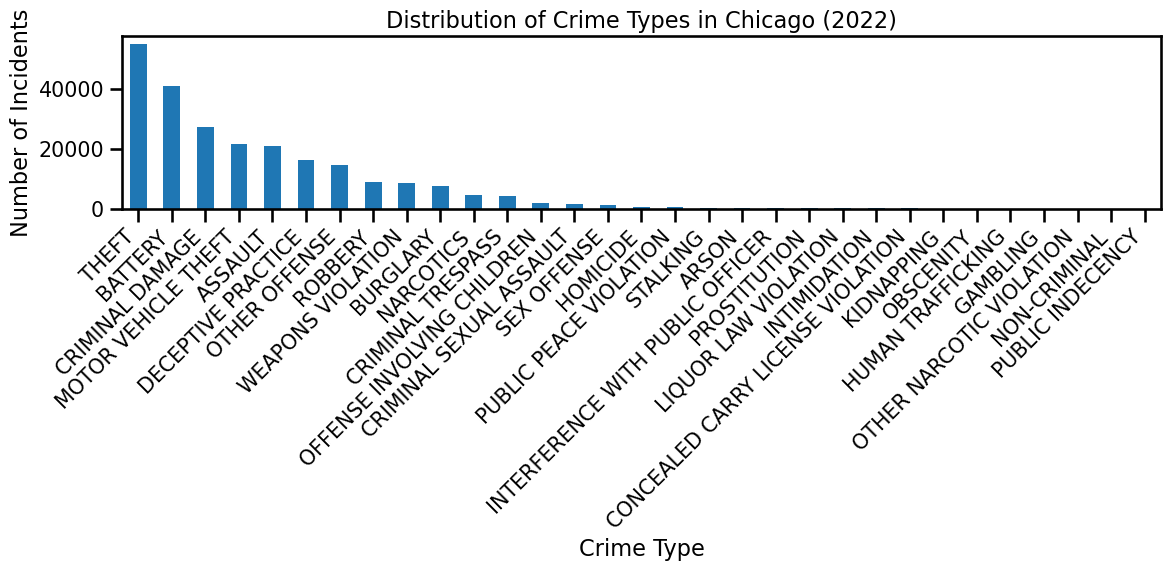

In [24]:
dataframes = [
    df_2001, df_2002, df_2003, df_2004,
    df_2005, df_2006, df_2007, df_2008,
    df_2009, df_2010, df_2011, df_2012,
    df_2013, df_2014, df_2015, df_2016,
    df_2017, df_2018, df_2019, df_2020,
    df_2021, df_2022
]

# Loop through each DataFrame and create a bar plot
for i, df_year in enumerate(dataframes, start=2001):
    crime_types_counts = df_year['Primary Type'].value_counts()

    # Plotting the bar graph
    plt.figure(figsize=(12, 6))
    crime_types_counts.plot(kind='bar')
    plt.title(f'Distribution of Crime Types in Chicago ({i})')
    plt.xlabel('Crime Type')
    plt.ylabel('Number of Incidents')
    plt.xticks(rotation=45, ha='right') 
    plt.tight_layout()

    # Show the plot
    plt.show()

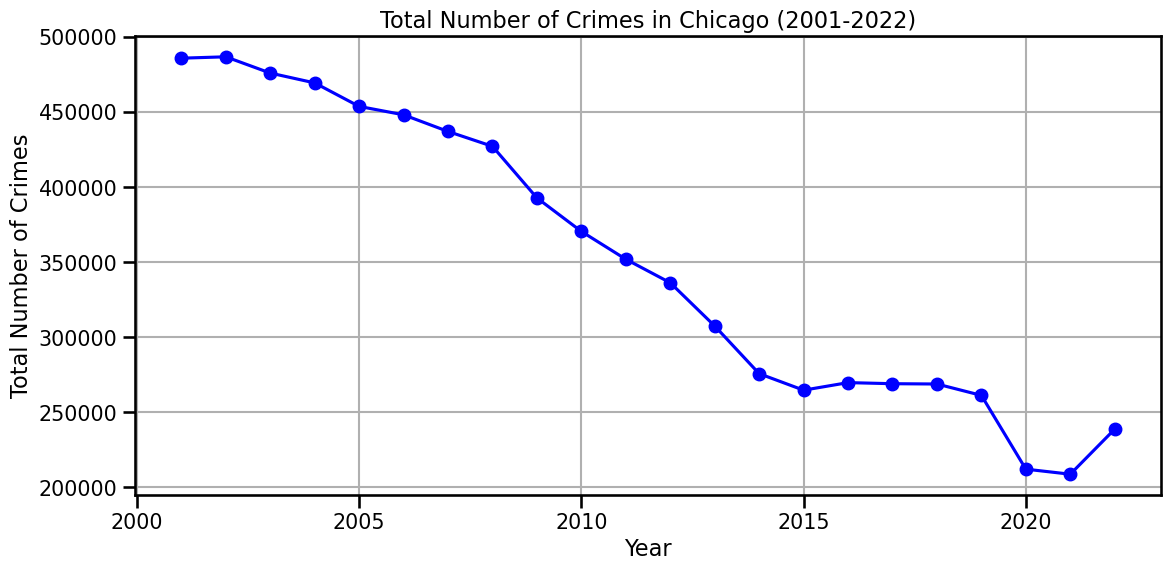

In [25]:
# Calculate the total number of crimes for each year
total_crimes_per_year = [df_year.shape[0] for df_year in dataframes]

# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(range(2001, 2023), total_crimes_per_year, marker='o', linestyle='-', color='b')
plt.title('Total Number of Crimes in Chicago (2001-2022)')
plt.xlabel('Year')
plt.ylabel('Total Number of Crimes')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
# Throughout the last 21 years the number of crimes has steadily gone down until 2021 when there is a sudden increase

Overall crime has decreased burglary went down but theft, battery, and Narcotics stayed high, 2020 it drops aand then begins to climb but less overall.

## <u>Topic 3)Comparing AM vs PM Rush Hour:</u>
* Are crimes more common during the AM rush hour or PM rush hour?
    * You can consider any crime that occurred between 7 AM - 10 am as AM rush hour.
    * You can consider any crime that occured between 4 - 7 PM as PM rush hour.
* `Answer the questions:` What are the top 5  most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
* `Answer the questions:` Are Motor Vehicle Thefts more common during AM rush hour or PM rsuh hour?

## <u>Topic 4) Comparing Months:
* `Answer the questions:` What months have the most crime? What months have the least?

* `Answer the questions:` Are there any individual crimes that do not follow this patter? If so, which crimes?

## <u>Topic 5) Comparing Months:</u>

In [26]:
!pip install holidays

In [27]:
import holidays
import datetime as dt
from holidays import country_holidays

In [28]:
# making a date range that covers full dataset
all_days = pd.date_range(df_2022["Date"].min(), df_2022["Date"].max())
all_days

DatetimeIndex(['2022-01-01 01:00:00', '2022-01-02 01:00:00',
               '2022-01-03 01:00:00', '2022-01-04 01:00:00',
               '2022-01-05 01:00:00', '2022-01-06 01:00:00',
               '2022-01-07 01:00:00', '2022-01-08 01:00:00',
               '2022-01-09 01:00:00', '2022-01-10 01:00:00',
               ...
               '2022-12-22 01:00:00', '2022-12-23 01:00:00',
               '2022-12-24 01:00:00', '2022-12-25 01:00:00',
               '2022-12-26 01:00:00', '2022-12-27 01:00:00',
               '2022-12-28 01:00:00', '2022-12-29 01:00:00',
               '2022-12-30 01:00:00', '2022-12-31 01:00:00'],
              dtype='datetime64[ns]', length=365, freq='D')

In [29]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [30]:
# Testing first date
print(all_days[0])
us_holidays.get(all_days[0])

2022-01-01 01:00:00


"New Year's Day"

In [31]:
# For a specific subdivisions (e.g. state or province):
md_holidays = country_holidays('US', subdiv='MD')
md_holidays

holidays.country_holidays('US', subdiv='MD')

In [32]:
# Saving both holiday types as columns
df_2022["US Holiday"] = [us_holidays.get(day) for day in df_2022['Date']]
df_2022['MD Holiday'] = [md_holidays.get(day) for day in df_2022['Date']]
df_2022.head()

ID                    Date        Primary Type  \
0  12582293  01/01/2022 01:00:00 PM               THEFT   
1  12607313  01/01/2022 01:00:00 PM  DECEPTIVE PRACTICE   
2  12585671  01/01/2022 01:00:00 AM     CRIMINAL DAMAGE   
3  12592889  01/01/2022 01:00:00 AM       OTHER OFFENSE   
4  12584977  01/01/2022 01:00:00 AM               THEFT   

                               Description  \
0                           $500 AND UNDER   
1  FINANCIAL IDENTITY THEFT $300 AND UNDER   
2                               TO VEHICLE   
3                  HARASSMENT BY TELEPHONE   
4                           $500 AND UNDER   

                     Location Description  Arrest  Domestic  Beat  District  \
0                              RESTAURANT   False     False   121       1.0   
1                                    BANK   False     False   811       8.0   
2  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False   531       5.0   
3                               APARTMENT   False     False   412       4.0   
4                         OTHER (SPECIFY)   False     False  1811      18.0   

   Ward   Latitude  Longitude      US Holiday      MD Holiday  
0  42.0  41.881884 -87.640060  New Year's Day  New Year's Day  
1  23.0  41.787923 -87.769446  New Year's Day  New Year's Day  
2   9.0  41.687443 -87.604120  New Year's Day  New Year's Day  
3   8.0  41.734353 -87.585147  New Year's Day  New Year's Day  
4   2.0  41.910818 -87.654560  New Year's Day  New Year's Day

In [33]:
# US Holidays
df_2022['US Holiday'].value_counts()

Veterans Day                                       780
Juneteenth National Independence Day (Observed)    761
New Year's Day                                     758
Juneteenth National Independence Day               733
Labor Day                                          732
Memorial Day                                       724
Columbus Day                                       717
Independence Day                                   711
Thanksgiving                                       570
Washington's Birthday                              542
Martin Luther King Jr. Day                         491
Christmas Day (Observed)                           468
Christmas Day                                      413
Name: US Holiday, dtype: int64

In [34]:
## MD Holidays
df_2022['MD Holiday'].value_counts()

Veterans Day                                       780
Juneteenth National Independence Day (Observed)    761
New Year's Day                                     758
Juneteenth National Independence Day               733
Labor Day                                          732
Memorial Day                                       724
Columbus Day                                       717
Independence Day                                   711
American Indian Heritage Day                       658
Thanksgiving                                       570
Washington's Birthday                              542
Martin Luther King Jr. Day                         491
Christmas Day (Observed)                           468
Christmas Day                                      413
Name: MD Holiday, dtype: int64

In [35]:
# Concatenate all dataframes into one dataframe
all_data = pd.concat(dataframes)

# Convert 'Date' column to datetime format and set index
all_data['Date'] = pd.to_datetime(all_data['Date'], errors='coerce')
all_data = all_data.set_index('Date')
# Create a DataFrame to store crime trends for each type
crime_trends = all_data.groupby(['Date', 'Primary Type']).size().unstack(fill_value=0)

In [36]:
# Setting crime trends
crime_trends = all_data.groupby(['Primary Type']).resample('D').size().unstack(fill_value=0)
crime_trends.head(5)

Date                               2001-01-01  2001-01-02  2001-01-03  \
Primary Type                                                            
ARSON                                       0           0           1   
ASSAULT                                    70          66          79   
BATTERY                                   296         143         165   
BURGLARY                                   66          68          57   
CONCEALED CARRY LICENSE VIOLATION           0           0           0   

Date                               2001-01-04  2001-01-05  2001-01-06  \
Primary Type                                                            
ARSON                                       1           3           4   
ASSAULT                                    57          68          67   
BATTERY                                   173         178         237   
BURGLARY                                   55          55          64   
CONCEALED CARRY LICENSE VIOLATION           0           0           0   

Date                               2001-01-07  2001-01-08  2001-01-09  \
Primary Type                                                            
ARSON                                       0           3           3   
ASSAULT                                    61          67          63   
BATTERY                                   218         192         212   
BURGLARY                                   51          53          75   
CONCEALED CARRY LICENSE VIOLATION           0           0           0   

Date                               2001-01-10  2001-01-11  2001-01-12  \
Primary Type                                                            
ARSON                                       2           2           4   
ASSAULT                                    88          89          78   
BATTERY                                   199         222         239   
BURGLARY                                   71          62          69   
CONCEALED CARRY LICENSE VIOLATION           0           0           0   

Date                               2001-01-13  2001-01-14  2001-01-15  \
Primary Type                                                            
ARSON                                       5           1           1   
ASSAULT                                    79          72          62   
BATTERY                                   251         249         203   
BURGLARY                                   53          44          71   
CONCEALED CARRY LICENSE VIOLATION           0           0           0   

Date                               2001-01-16  2001-01-17  2001-01-18  \
Primary Type                                                            
ARSON                                       0           3           2   
ASSAULT                                    58          72          69   
BATTERY                                   219         205         232   
BURGLARY                                   65          76          69   
CONCEALED CARRY LICENSE VIOLATION           0           0           0   

Date                               2001-01-19  2001-01-20  2001-01-21  \
Primary Type                                                            
ARSON                                       2           6           0   
ASSAULT                                    47          53          51   
BATTERY                                   200         239         222   
BURGLARY                                   65          53          38   
CONCEALED CARRY LICENSE VIOLATION           0           0           0   

Date                               2001-01-22  2001-01-23  2001-01-24  \
Primary Type                                                            
ARSON                                       1           3           1   
ASSAULT                                    64          60          67   
BATTERY                                   181         208         181   
BURGLARY                                   65      

In [37]:
#  Flipping columns and rows
crime_trends = crime_trends.T
crime_trends.head(5)

Primary Type  ARSON  ASSAULT  BATTERY  BURGLARY  \
Date                                              
2001-01-01        0       70      296        66   
2001-01-02        0       66      143        68   
2001-01-03        1       79      165        57   
2001-01-04        1       57      173        55   
2001-01-05        3       68      178        55   

Primary Type  CONCEALED CARRY LICENSE VIOLATION  CRIM SEXUAL ASSAULT  \
Date                                                                   
2001-01-01                                    0                   38   
2001-01-02                                    0                    2   
2001-01-03                                    0                    7   
2001-01-04                                    0                    2   
2001-01-05                                    0                    6   

Primary Type  CRIMINAL DAMAGE  CRIMINAL SEXUAL ASSAULT  CRIMINAL TRESPASS  \
Date                                                                        
2001-01-01                233                        3                 29   
2001-01-02                118                        0                 35   
2001-01-03                136                        0                 35   
2001-01-04                133                        0                 29   
2001-01-05                142                        0                 29   

Primary Type  DECEPTIVE PRACTICE  DOMESTIC VIOLENCE  GAMBLING  HOMICIDE  \
Date                                                                      
2001-01-01                    94                  0         2         2   
2001-01-02                    78                  0         1         0   
2001-01-03                    49                  0         0         0   
2001-01-04                    42                  0         2         2   
2001-01-05                    53                  0         0         1   

Primary Type  HUMAN TRAFFICKING  INTERFERENCE WITH PUBLIC OFFICER  \
Date                                                                
2001-01-01                    0                                 1   
2001-01-02                    0                                 1   
2001-01-03                    0                                 0   
2001-01-04                    0                                 3   
2001-01-05                    0                                 2   

Primary Type  INTIMIDATION  KIDNAPPING  LIQUOR LAW VIOLATION  \
Date                                                           
2001-01-01               1           2                     3   
2001-01-02               1           1                     2   
2001-01-03               0           3                     2   
2001-01-04               1           2                     4   
2001-01-05               0           3                     8   

Primary Type  MOTOR VEHICLE THEFT  NARCOTICS  NON - CRIMINAL  NON-CRIMINAL  \
Date                                                                         
2001-01-01                     60         97               0             0   
2001-01-02                     65        175               0             0   
2001-01-03                     72        133               0             0   
2001-01-04                     87        142               0             0   
2001-01-05                     86        185               0             0   

Primary Type  NON-CRIMINAL (SUBJECT SPECIFIED)  OBSCENITY  \
Date                                                        
2001-01-01                                   0          0   
2001-01-02                                   0          0   
2001-01-03                                   0          0   
2001-01-04                                   0          0   
2001-01-05                                   0          0   

Primary Type  OFFENSE INVOLVING CHILDREN  OTHER NARCOTIC VIOLATION  \
Date                                                                 
2001-01-01             

In [41]:
ax = sns.barplot(data=df_2022, x='US Holiday',y='Total_Incidents',estimator=np.sum)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right');

ValueError: Could not interpret input 'Total_Incidents'

* `Answer the questions:` What are the top 3 holidays with the largest number of crimes?

* `Answer the questions:` For each of the top 3 Holidays with the the most crime, what are the top 5 most common crimes of that holiday?

## <u>Topic 6) What cycles (seasonality) can you find in this data?
* **Make sure to select the data of interest and that it is resampled to the frequency you want.** `(See the "Suggested data to check for seasons" list at the bottom of topic for suggestions).`
* **Use statmodels.tsa.seasonal.seasonal_decompose() the time series.**
    *  `Note:` seasonal_decompose cannot read data resampled as minutes or smaller, and ifyou try seconds, you will crash you computer. Keep your resampling at hours or more.
* **Show and describe each cycle you can find.**
    * ***(Hint: If your seasonal results are too dense to read, try zooming in to look at just one year or one month and try different levels of resampling).***
    * `Answer the questions:` How long is a cycle?
    * `Answer the questions:` What is the magnitude of the cycle? ***(Compare min and max)***
* <u>Suggested data to check for seasons:</u>
    * Total Crime `(Daily)`
    * Total Crime `(Weekly)`
    * Total Crime `(Monthly)`
    * Select a Primary Type of interest to you `(Daily)`
    * Select a Primary Type of interest to you `(Weekly)`
    * Select a Primary Type of interest to you `(Monthly)`